## Random walk on a graph

Let
- $G$ be a connected graph with n nodes $N$ and m edges $E$.
- $d(v)$ is the degree of $v$

The transition probability matrix is 

$$
P_{u,v} = \left\{ \begin{array}{rr} 
dist(u,v) /d(v) & \text{for} \ {u,v} \in E\\
0      & \text{for} \ {u,v} \notin E
\end{array} \right.
$$

The sequence of nodes $\{X_1, X_2, X_3, ...\}$ is a Markov chain on $\{1, 2, ..., n\}$

**Transition matrix**

$P = D^{-1}A$ where $A$ is the adjacency matrix and $D$ is the laplacian matrix

**Stationary distribution**

$$
\pi = \dfrac{\lim}{n \rightarrow \infty} P^n
$$

and

$$
\pi_i = \sum_j \pi_j P_{i,j}
$$

### Importing libraries

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.style.use("science")
import math
import matplotlib as mpl
from random import shuffle
import pandas as pd
import networkx as nx
np.random.seed = 123

### Random directed graph

In [2]:
dig = nx.DiGraph()
n = 5
m = 20
# Nodes
nodes = list(range(n))
for node in nodes:
    dig.add_node(node)
# Edges
for i in range(n):
    for j in range(n):
        if i != j :
            w = np.random.randint(1, 10)
            dig.add_edge(nodes[i], nodes[j], weigths=w)
            dig.add_edge(nodes[j], nodes[i], weigths=w)

### Visualize the graph

In [3]:
dig.nodes()

NodeView((0, 1, 2, 3, 4))

In [4]:
def draw_digraph(g, node_color = "silver", title = "DiGraph"):
    fig, ax = plt.subplots(figsize=(5, 2))
    pos = nx.circular_layout(g)
    nx.draw_networkx_nodes(g, pos, g.nodes(), node_color = node_color)
    nx.draw_networkx_edges(g, pos)
    edge_labels = nx.get_edge_attributes(g, "weigths")
    nx.draw_networkx_edge_labels(g, pos, edge_labels)
    nx.draw_networkx_labels(g, pos)
    plt.axis("off")
    plt.title(title)
    plt.show()

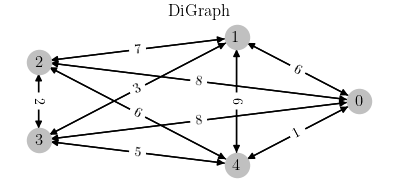

In [5]:
draw_digraph(dig)

### Transition matrix

In [6]:
D = np.zeros((n, n))

In [7]:
edges = [e for e in dig.edges()]
for i in range(len(edges)):
    edge = edges[i]
    u = edge[0]
    v = edge[1]
    dist = dig.get_edge_data(u, v)["weigths"]
    D[u, v] = float(dist)
## Make it a stochastic matrix
P = D.copy()
for i in range(n):
    P[i, :] /= P[i, :].sum()

In [8]:
D

array([[0., 6., 8., 8., 1.],
       [6., 0., 7., 3., 6.],
       [8., 7., 0., 2., 6.],
       [8., 3., 2., 0., 5.],
       [1., 6., 6., 5., 0.]])

In [9]:
P

array([[0.        , 0.26086957, 0.34782609, 0.34782609, 0.04347826],
       [0.27272727, 0.        , 0.31818182, 0.13636364, 0.27272727],
       [0.34782609, 0.30434783, 0.        , 0.08695652, 0.26086957],
       [0.44444444, 0.16666667, 0.11111111, 0.        , 0.27777778],
       [0.05555556, 0.33333333, 0.33333333, 0.27777778, 0.        ]])

### Random walk sampling

In [10]:
def sample_nodes(mu_0:np.array, P:np.matrix, size:int):
    markov_chain = []
    # Number of states
    N = mu_0.size
    # States of the chain
    states = list(range(N))
    # Sample z0 initial state
    z0 = np.random.choice(states, p = mu_0)
    # Add z0 to the chain
    markov_chain.append(z0)
    for n in range(2, size):
        # Value of the current stats z_n
        zn = markov_chain[-1]
        # Sample the value of the next state z_n+1
        next = np.random.choice(states, p = P[zn, :])
        # Add the sampled value to the chain
        markov_chain.append(next)
    # Return the simulated chain
    return list(markov_chain)

In [11]:
snodes = sample_nodes(np.ones(5) / 5, P, 10)
snodes

[1, 0, 1, 3, 0, 2, 0, 2, 1]

### Sample graphs

In [12]:
def sample_graph(size):
    snodes = sample_nodes(np.ones(n) / n, P, size)
    markov_chain = snodes.copy()
    snodes = list(np.unique(snodes))
    g = nx.DiGraph()
    print(snodes)
    for node in snodes:
        g.add_node(node)
    for i in snodes:
        for j in snodes:
            if i!=j and D[i, j] > 0:
                g.add_edge(i, j, weights = D[i, j])
    return g, snodes, markov_chain

In [13]:
nsamples = 3
sampled_graph = []
sampled_nodes = []
sampled_chain = []
for i in range(nsamples):
    sg, snodes, chain = sample_graph(5)
    sampled_graph.append(sg)
    sampled_nodes.append(snodes)
    sampled_chain.append(chain)

[0, 1, 2]
[0, 1, 2, 3]
[0, 2, 3, 4]


**Simulated Markov Chain**

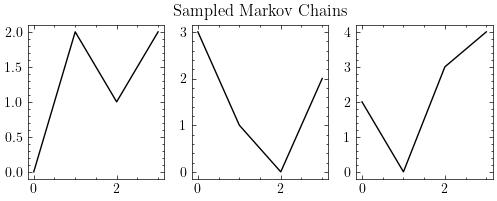

In [14]:
fig, axes = plt.subplots(1, nsamples, figsize = (6, 2))
for i in range(nsamples):
    axes[i].plot(sampled_chain[i], color = "black")
axes[1].set_title("Sampled Markov Chains")
plt.show()

**Sampled nodes and edges**

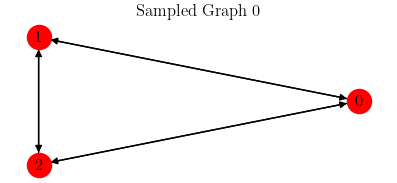

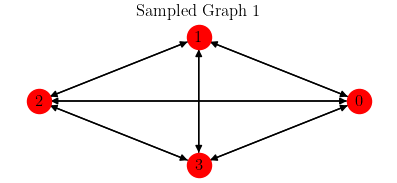

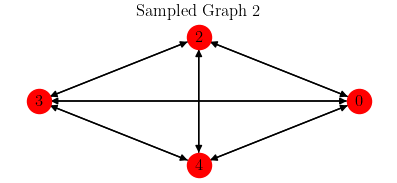

In [15]:
for i in range(len(sampled_graph)):
    draw_digraph(sampled_graph[i], node_color = "red", title = "Sampled Graph " + str(i))

**Sampled nodes from the directed graph**

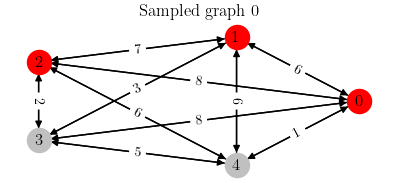

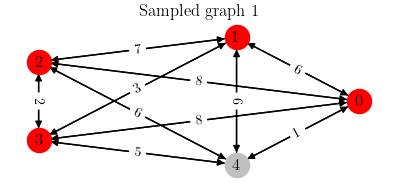

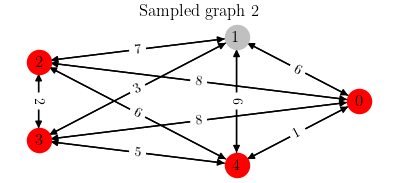

In [16]:
for i in range(len(sampled_graph)):
    sgraph = sampled_graph[i]
    snodes = sampled_nodes[i]
    snodes = set(snodes)
    fig, ax = plt.subplots(figsize=(5, 2))
    pos = nx.circular_layout(dig)
    nodes = dig.nodes()
    for node in dig.nodes():
        if node in snodes:
            nx.draw_networkx_nodes(dig, pos, [node], node_color = "red")
        else:
            nx.draw_networkx_nodes(dig, pos, [node], node_color = "silver")
    nx.draw_networkx_edges(dig, pos)
    edge_labels = nx.get_edge_attributes(dig, "weigths")
    nx.draw_networkx_edge_labels(dig, pos, edge_labels)
    nx.draw_networkx_labels(dig, pos)
    plt.axis("off")
    plt.title("Sampled graph " + str(i))
    plt.show()

### Stationary distribution

In [17]:
def stationary_dist(P, n, itermax = 100, eps = 1e-3):
    P0 = P.copy()
    loss0 = 0.
    for i in range(itermax):
        P = P.copy() @ P.copy()
        loss = np.linalg.norm(P - P0)
        if abs(loss - loss0) < eps:
            print("Convergence at epoch {}".format(i))
            break
        else:
            loss0 = loss
    return P

In [18]:
Plim = stationary_dist(P, n)

Convergence at epoch 4


In [19]:
Plim = np.round(Plim, 2)
Plim

array([[0.22, 0.21, 0.22, 0.17, 0.17],
       [0.22, 0.21, 0.22, 0.17, 0.17],
       [0.22, 0.21, 0.22, 0.17, 0.17],
       [0.22, 0.21, 0.22, 0.17, 0.17],
       [0.22, 0.21, 0.22, 0.17, 0.17]])

The corresponding stationary graph is

In [20]:
stat_g = nx.DiGraph()
# Nodes
nodes = list(range(n))
for node in nodes:
    stat_g.add_node(node)
# Edges
for i in range(n):
    for j in range(n):
            stat_g.add_edge(nodes[i], nodes[j], weigths=Plim[i,j])
            stat_g.add_edge(nodes[j], nodes[i], weigths=Plim[i,j])

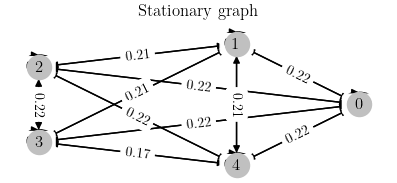

In [21]:
draw_digraph(stat_g, title = "Stationary graph")